# Supervised Classification of Iris data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#Get-Iris-data" data-toc-modified-id="Get-Iris-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get Iris data</a></span></li><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore data</a></span></li><li><span><a href="#Transform-Iris" data-toc-modified-id="Transform-Iris-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transform Iris</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-classifier" data-toc-modified-id="Decision-tree-classifier-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Decision tree classifier</a></span></li><li><span><a href="#Random-forest-classifier" data-toc-modified-id="Random-forest-classifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random forest classifier</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Gradient-boosting-classifier" data-toc-modified-id="Gradient-boosting-classifier-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Gradient boosting classifier</a></span></li><li><span><a href="#Naive-Bayes-classifier" data-toc-modified-id="Naive-Bayes-classifier-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Naive Bayes classifier</a></span></li><li><span><a href="#K-Nearest-Neighbor-classifier" data-toc-modified-id="K-Nearest-Neighbor-classifier-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>K-Nearest-Neighbor classifier</a></span></li><li><span><a href="#SVM-classifier" data-toc-modified-id="SVM-classifier-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>SVM classifier</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Of-interest" data-toc-modified-id="Of-interest-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Of interest</a></span><ul class="toc-item"><li><span><a href="#T-Distributed-Stochastic-Neighboring-Entities-(t-SNE)" data-toc-modified-id="T-Distributed-Stochastic-Neighboring-Entities-(t-SNE)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>T-Distributed Stochastic Neighboring Entities (t-SNE)</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## imports

In [1]:
# analytical tools
import pandas as pd
import seaborn as sns

## Get Iris data

In [2]:
from sklearn.datasets import load_iris 
bunch = load_iris()
type(bunch)

sklearn.utils.Bunch

In [3]:
bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
bunch['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = pd.DataFrame(bunch['data'])
data.columns = bunch['feature_names']
data['variety'] = bunch['target']
data['variety_name'] = (
    pd.Series(bunch['target'])
    .map(lambda x: bunch['target_names'][x])
)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety,variety_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


## Explore data

In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# quick overview of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   variety            150 non-null    int64  
 5   variety_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.groupby('variety_name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
variety_name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


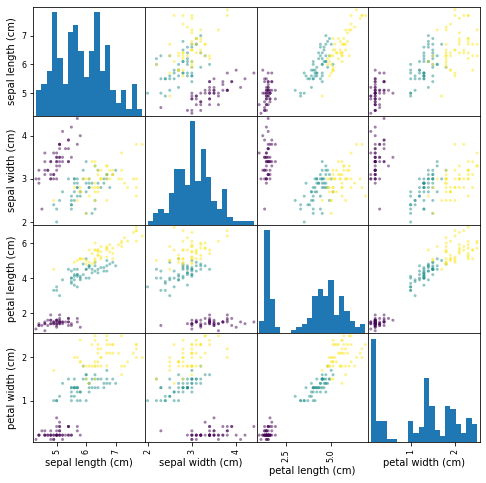

In [9]:
# SPLOM plot
_ = pd.plotting.scatter_matrix(data[data.columns[0:4]],
    c=data['variety'],
    hist_kwds = { 'bins' : 20 }, 
    figsize=(8,8),
)

## Transform Iris

In [10]:
# no transformation needed

## Classification

In [27]:
x = data[data.columns[0:4]]
y = data['variety']

# how many targets?
y.value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

In [12]:
# split the data into 70% train and 30% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = (
    train_test_split(x, y, test_size=0.3, random_state=0)
)

In [13]:
results = {}

### Decision tree classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)            # build
dtc.fit(x_train, y_train)                            # fit
results['Decision Tree'] = dtc.score(x_test, y_test) # predict
results['Decision Tree']

0.9777777777777777

### Random forest classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)        # build
rfc.fit(x_train, y_train)                             # fit
results['Random Forest'] = rfc.score(x_test, y_test)  # predict
results['Random Forest']

0.9777777777777777

### Multinomial logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=1000,
                         multi_class='multinomial',)
lrc.fit(x_train, y_train) 
results['Multinomial logistic Regr'] = lrc.score(x_test, y_test)
results['Multinomial logistic Regr'] 

0.9777777777777777

### Gradient boosting classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)       # build
gbc.fit(x_train, y_train)                               # fit
results['Gradient Boosting'] = gbc.score(x_test, y_test)# predict
results['Gradient Boosting']

0.9777777777777777

### Naive Bayes classifier

In [18]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(x_train, y_train) 
results['Naive Bayes'] = nbc.score(x_test, y_test)  
results['Naive Bayes']

1.0

### K-Nearest-Neighbor classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)                               # fit
results['KNN'] = knn.score(x_test, y_test)  
results['KNN']

0.9777777777777777

### SVM classifier

In [20]:
from sklearn.svm import SVC
#svc = SVC(probability=True, kernel='linear')
#svc = SVC(probability=True, kernel='poly', degree=3)
svc = SVC(probability=True, kernel='rbf')
svc.fit(x_train, y_train)                               # fit
results['SVM'] = svc.score(x_test, y_test) 
results['SVM']

0.9777777777777777

## Results

In [21]:
pd.Series(results).sort_values(ascending=False)

Naive Bayes          1.000000
Decision Tree        0.977778
Random Forest        0.977778
Logistic Regr        0.977778
Gradient Boosting    0.977778
KNN                  0.977778
SVM                  0.977778
dtype: float64

## Of interest

### T-Distributed Stochastic Neighboring Entities (t-SNE)
This is a dimension reduction technique for data viz,
but it is also good at grouping, and labeling against known targets. 
However, there is no 'fit' method for test data. 

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, 
            n_iter=10000, random_state=43)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.146309
[t-SNE] KL divergence after 1600 iterations: 0.084559


<AxesSubplot:>

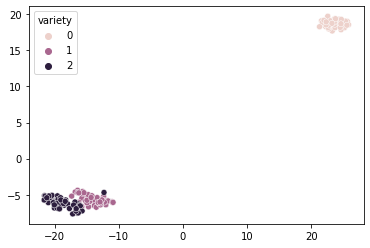

In [25]:
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1],
                hue=y)

## The End